# Grafos
# Clasificacion Edros-Renyi

Modelos de clasifiacion (conectividad) y regresion (energia) usando Dense MLP de Keras

Se ve tambien la calidad de estos modelos para datos generados con Modelos de BA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import random

In [2]:
# Importar funciones importantes de grafos de mi autoria
from funciones_grafos import *

### Cargar los datos

Se usan los datos de Edros con varios p. Tambien se cargan los datos de barabasi para hacer algunas comparaciones

In [3]:
X = np.load('.\datos\datos_edros_N1000000_n20_multiple_p.npy')
y_e = np.load('.\datos\datos_edros_N1000000_n20_multiple_p_etiqueta_energia.npy')
y_c = np.load('.\datos\datos_edros_N1000000_n20_multiple_p_etiqueta_conectividad.npy')

print(X.shape)
print(y_e.shape)
print(y_c.shape)

X_bar = np.load('.\datos\datos_barabasi_N1000000_n20_m1.npy')
y_e_bar = np.load('.\datos\datos_barabasi_N1000000_n20_m1_etiqueta_energia.npy')
y_c_bar = np.load('.\datos\datos_barabasi_N1000000_n20_m1_etiqueta_conectividad.npy')

print(X_bar.shape)
print(y_e_bar.shape)
print(y_c_bar.shape)

(1000000, 190)
(1000000,)
(1000000,)
(1000000, 190)
(1000000,)
(1000000,)


## Energia

Crear y entrenar modelo (ya realizado)

In [4]:
'''
X_train, X_test, y_train, y_test  = train_test_split(X, y_e)

model_e = Sequential()
model_e.add(Dense(300, activation = 'relu', input_shape = (190,)))
model_e.add(Dense(200, activation = 'relu'))
model_e.add(Dense(200, activation = 'relu'))
model_e.add(Dense(100, activation = 'relu'))
model_e.add(Dense(1, activation = 'linear'))

model_e.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.25,
                   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 15)])

# ver proceso de entrenamiendo 
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# salvar modelo
# model_e.save('.\modelos\prueba_energia.h5')
'''

"\nX_train, X_test, y_train, y_test  = train_test_split(X, y_e)\n\nmodel_e = Sequential()\nmodel_e.add(Dense(300, activation = 'relu', input_shape = (190,)))\nmodel_e.add(Dense(200, activation = 'relu'))\nmodel_e.add(Dense(200, activation = 'relu'))\nmodel_e.add(Dense(100, activation = 'relu'))\nmodel_e.add(Dense(1, activation = 'linear'))\n\nmodel_e.compile(optimizer='adam', loss='mean_squared_error')\n\nhistory = model.fit(X_train, y_train, epochs = 100, validation_split = 0.25,\n                   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 15)])\n\n# ver proceso de entrenamiendo \nplt.plot(history.history['loss'], label = 'training loss')\nplt.plot(history.history['val_loss'], label = 'validation loss')\nplt.legend()\nplt.xlabel('Epoch')\nplt.ylabel('Loss')\nplt.show()\n\n# salvar modelo\n# model_e.save('.\\modelos\\prueba_energia.h5')\n"

In [5]:
# cargar modelo
model_e = load_model('.\modelos\prueba_energia.h5')

In [6]:
model_e.evaluate(X, y_e)

31250/31250 [==============================] - 30s 934us/step - loss: 0.4059


0.40593990683555603

## Conectividad

Crear y entrenar modelo (ya realizado)

In [8]:
'''
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test  = train_test_split(X, y_c)

model_c = Sequential()
model_c.add(Dense(300, activation = 'relu', input_shape = (190,)))
model_c.add(Dense(200, activation = 'relu'))
model_c.add(Dense(200, activation = 'relu'))
model_c.add(Dense(100, activation = 'relu'))
model_c.add(Dense(1, activation = 'sigmoid'))
model_c.compile(optimizer='adam', loss='binary_crossentropy', metrics = 'accuracy')

history = model_c.fit(X_train, y_train, epochs = 100, validation_split = 0.25,
                   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 15)])

# ver entrenamiento
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Salvar la red neuronal entrenada
# model_c.save('.\modelos\prueba_conectividad.h5')
'''

"\n# Dividir los datos en entrenamiento y prueba\nX_train, X_test, y_train, y_test  = train_test_split(X, y_c)\n\nmodel_c = Sequential()\nmodel_c.add(Dense(300, activation = 'relu', input_shape = (190,)))\nmodel_c.add(Dense(200, activation = 'relu'))\nmodel_c.add(Dense(200, activation = 'relu'))\nmodel_c.add(Dense(100, activation = 'relu'))\nmodel_c.add(Dense(1, activation = 'sigmoid'))\nmodel_c.compile(optimizer='adam', loss='binary_crossentropy', metrics = 'accuracy')\n\nhistory = model_c.fit(X_train, y_train, epochs = 100, validation_split = 0.25,\n                   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 15)])\n\n# ver entrenamiento\nplt.plot(history.history['accuracy'], label = 'training accuracy')\nplt.plot(history.history['val_accuracy'], label = 'validation accuracy')\nplt.legend()\nplt.xlabel('Epoch')\nplt.ylabel('accuracy')\nplt.show()\n\nplt.plot(history.history['loss'], label = 'training loss')\nplt.plot(history.history['val_loss'], label = 'validation 

In [9]:
model_c = load_model('.\modelos\prueba_conectividad.h5')

In [10]:
model_c.evaluate(X, y_c)

31250/31250 [==============================] - 38s 1ms/step - loss: 0.0687 - accuracy: 0.9956


[0.06869859993457794, 0.9955580234527588]

## Ver unas cosas

Grafo generado con Edros-Renyi, p= 0.37

Energia real:  42.196740943824324
Prediccion de energia:  42.636177
Conectividad:  1
Prediccion de conectividad:  1.0


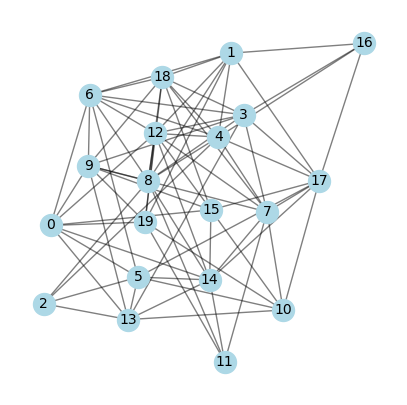

In [22]:
# Prediccion individual EDROS

p = random.uniform(0.1, 0.5)
print('Grafo generado con Edros-Renyi, p=', round(p, 2))
print('')

vector = np.random.choice([0, 1], size=(190, ), p = [1-p, p])

energy = energia_from_vector(vector)
conectividad = conectividad_from_vector(vector)
energy_pred = model_e.predict(np.resize(vector, (1, 190)), verbose = 0)[0, 0]
conectividad_pred = model_c.predict(np.resize(vector, (1, 190)), verbose = 0)[0, 0]


print('Energia real: ', energy)
print('Prediccion de energia: ', energy_pred)
print('Conectividad: ', conectividad)
print('Prediccion de conectividad: ', conectividad_pred)

dibujar_grafo_from_vector(vector)

Grafo generado con Barabasi-Albert, m= 1

Energia real:  22.33277264903447
Prediccion de energia:  22.937708
Conectividad:  1
Prediccion de conectividad:  0.33735448


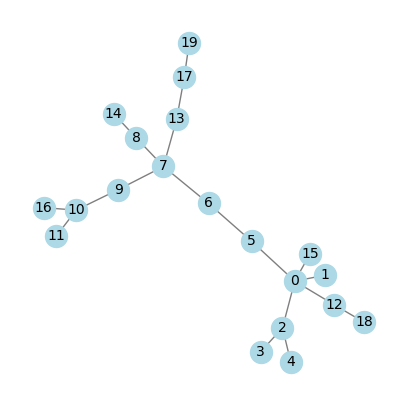

In [25]:
# Prediccion individual BARABASI

m = random.randint(1,5)
print('Grafo generado con Barabasi-Albert, m=', m)
print('')

vector = grafo_barabasi_m_equal_m0(m, 20)

energy = energia_from_vector(vector)
conectividad = conectividad_from_vector(vector)
energy_pred = model_e.predict(np.resize(vector, (1, 190)), verbose = 0)[0, 0]
conectividad_pred = model_c.predict(np.resize(vector, (1, 190)), verbose = 0)[0, 0]


print('Energia real: ', energy)
print('Prediccion de energia: ', energy_pred)
print('Conectividad: ', conectividad)
print('Prediccion de conectividad: ', conectividad_pred)

dibujar_grafo_from_vector(vector)

In [26]:
# checar isomorfismos EDROS

p = random.uniform(0.1, 0.5)
print('Grafo generado con Edros-Renyi, p=', round(p, 2))
print('')

vector = np.random.choice([0, 1], size=(190, ), p = [1-p, p])
matriz = vector_to_matriz(vector) # matriz de adyacencia

energy = energia_from_vector(vector)
conectividad = conectividad_from_vector(vector)

energy_pred = model_e.predict(np.resize(vector, (1, 190)), verbose = 0)[0, 0]
conectividad_pred = model_c.predict(np.resize(vector, (1, 190)), verbose = 0)[0, 0]


print('Energia real: ', energy)
print('Prediccion de energia: ', energy_pred)
print('Conectividad: ', conectividad)
print('Prediccion de conectividad: ', conectividad_pred)
print('')

print('Prediccion en grafos isomorfos: ')
for i in range(20):
    matriz_p = permutar_matriz_aleatorio(matriz)
    vector_p = matriz_to_vector(matriz_p)
    
    energy_pred = model_e.predict(np.resize(vector_p, (1, 190)), verbose = 0)[0, 0]
    energy_pred = round(energy_pred, 5)
    conectividad_pred = model_c.predict(np.resize(vector_p, (1, 190)), verbose = 0)[0, 0]
    
    print(energy_pred, conectividad_pred)

Grafo generado con Edros-Renyi, p= 0.46

Energia real:  43.62440943195143
Prediccion de energia:  44.49929
Conectividad:  1
Prediccion de conectividad:  1.0

Prediccion en grafos isomorfos: 
44.70438 1.0
44.68131 1.0
44.72986 1.0
44.40723 1.0
44.64979 1.0
44.58077 1.0
44.45086 1.0
44.75677 1.0
44.60727 1.0
44.45048 1.0
44.70876 1.0
44.61022 1.0
44.76417 1.0
44.68142 1.0
44.25778 1.0
44.30616 1.0
44.58897 1.0
44.5962 1.0
44.43616 1.0
44.57018 1.0


In [27]:
# checar isomorfismos BARABASI

m = random.randint(1, 5)
print('Grafo generado con Barabasi-Albert, m=', m)
print('')

vector = grafo_barabasi_m_equal_m0(m, 20)
matriz = vector_to_matriz(vector) # matriz de adyacencia

energy = energia_from_vector(vector)
conectividad = conectividad_from_vector(vector)

energy_pred = model_e.predict(np.resize(vector, (1, 190)), verbose = 0)[0, 0]
conectividad_pred = model_c.predict(np.resize(vector, (1, 190)), verbose = 0)[0, 0]


print('Energia real: ', energy)
print('Prediccion de energia: ', energy_pred)
print('Conectividad: ', conectividad)
print('Prediccion de conectividad: ', conectividad_pred)
print('')

print('Prediccion en grafos isomorfos: ')
for i in range(20):
    matriz_p = permutar_matriz_aleatorio(matriz)
    vector_p = matriz_to_vector(matriz_p)
    
    energy_pred = model_e.predict(np.resize(vector_p, (1, 190)), verbose = 0)[0, 0]
    energy_pred = round(energy_pred, 5)
    conectividad_pred = model_c.predict(np.resize(vector_p, (1, 190)), verbose = 0)[0, 0]
    
    print(energy_pred, conectividad_pred)

Grafo generado con Barabasi-Albert, m= 2

Energia real:  30.79644574016922
Prediccion de energia:  31.051546
Conectividad:  1
Prediccion de conectividad:  0.9953589

Prediccion en grafos isomorfos: 
30.73672 0.9999587
31.16868 0.9964309
31.03015 0.99962187
31.24039 0.9964053
31.00205 0.9978602
31.24579 0.9950038
31.01313 0.9937747
30.82846 0.99999934
31.32797 0.9991969
31.08228 0.99808955
30.82844 0.99932903
30.93553 0.9991502
31.18038 0.995965
31.44945 0.98552203
31.08355 0.98954785
31.05273 0.9998566
30.98648 0.99998033
30.36458 0.99794483
31.36317 0.9988553
31.03221 0.9978562
